<a href="https://colab.research.google.com/github/kanishkagargg/Customer-Churn-Prediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction

### Problem Statement:

Customer churn is a crucial concern for businesses across sectors. Understanding customer behaviors,
identifying key factors contributing to churn, and predicting when customers are likely to churn are vital
for reducing revenue loss and enhancing customer retention strategies.

* `customerID`: Customer ID
* `gender`: Customer's gender
* `SeniorCitizen`: Whether the customer is a senior citizen (1 for yes, 0 for no)
* `Partner`: Whether the customer has a partner
* `Dependents`: Whether the customer has dependents
* `tenure`: Number of months the customer has stayed with the company
* `PhoneService`: Whether the customer has phone service
* `MultipleLines`: Whether the customer has multiple phone lines
* `InternetService`: Type of internet service
* `OnlineSecurity`: Whether the customer has online security
* `OnlineBackup`: Whether the customer has online backup
* `DeviceProtection`: Whether the customer has device protection
* `TechSupport`: Whether the customer has tech support
* `StreamingTV`: Whether the customer streams TV
* `StreamingMovies`: Whether the customer streams movies
* `Contract`: Type of contract (e.g., month-to-month, one year, two years)
* `PaperlessBilling`: Whether the customer uses paperless billing
* `PaymentMethod`: Payment method (e.g., electronic check, mailed check)
* `MonthlyCharges`: Monthly charges
* `TotalCharges`: Total charges
* `Churn`: Target variable, indicating whether the customer churned (1 for yes, 0 for no)

### Basic Clean up

In [2]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 7.7 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix
from sklearn.feature_selection import chi2, SelectKBest, mutual_info_classif
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Mentoress Projects/Customer_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
for col in df.columns.tolist():
  print("No. of unique values in ",col ,'is' ,df[col].unique())

No. of unique values in  customerID is ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
No. of unique values in  gender is ['Female' 'Male']
No. of unique values in  SeniorCitizen is [0 1]
No. of unique values in  Partner is ['Yes' 'No']
No. of unique values in  Dependents is ['No' 'Yes']
No. of unique values in  tenure is [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
No. of unique values in  PhoneService is ['No' 'Yes']
No. of unique values in  MultipleLines is ['No phone service' 'No' 'Yes']
No. of unique values in  InternetService is ['DSL' 'Fiber optic' 'No']
No. of unique values in  OnlineSecurity is ['No' 'Yes' 'No internet service']
No. of unique values in  OnlineBackup is ['Yes' 'No' 'No internet service']
No. of unique values in  DeviceProtection is ['No' 'Yes' 'No i

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df = df.loc[df['TotalCharges'] != ' ']

In [11]:
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')

<ipython-input-11-0b7f1086af80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'] = df['TotalCharges'].astype(float)
<ipython-input-11-0b7f1086af80>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')


In [12]:
len(df[df.duplicated()])

0

In [13]:
df.describe(include = 'all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032,7032,7032.0,7032,7032,7032.000000,7032,7032,7032,7032,...,7032,7032,7032,7032,7032,7032,7032,7032.000000,7032.000000,7032
unique,7032,2,2.0,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,7590-VHVEG,Male,0.0,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3549,5890.0,3639,4933,NaN,6352,3385,3096,3497,...,3094,3472,2809,2781,3875,4168,2365,NaN,NaN,5163
mean,NaN,NaN,NaN,NaN,NaN,32.421786,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.798208,2283.300441,NaN
std,NaN,NaN,NaN,NaN,NaN,24.545260,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.085974,2266.771362,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.587500,401.450000,NaN
50%,NaN,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.862500,3794.737500,NaN


In [14]:
df = df.drop('customerID', axis = 'columns')

In [15]:
num_cols = list(df.select_dtypes(include=['float64', 'int64']).columns)
cat_cols = list(df.select_dtypes(include=['object', 'category']).columns)
print(num_cols)
print(cat_cols)

['tenure', 'MonthlyCharges', 'TotalCharges']
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


* There are 7043 rows initially and 21 rows.
* There were no duplicated row.
* There were no Null values but we find out Total charges has values which contains space values as a string. So we used loc to remove that rows. Now we have 7032 rows.
* There are 3 numerical columns and 17 categorical columns.

### Visualizations

#### Histogram

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

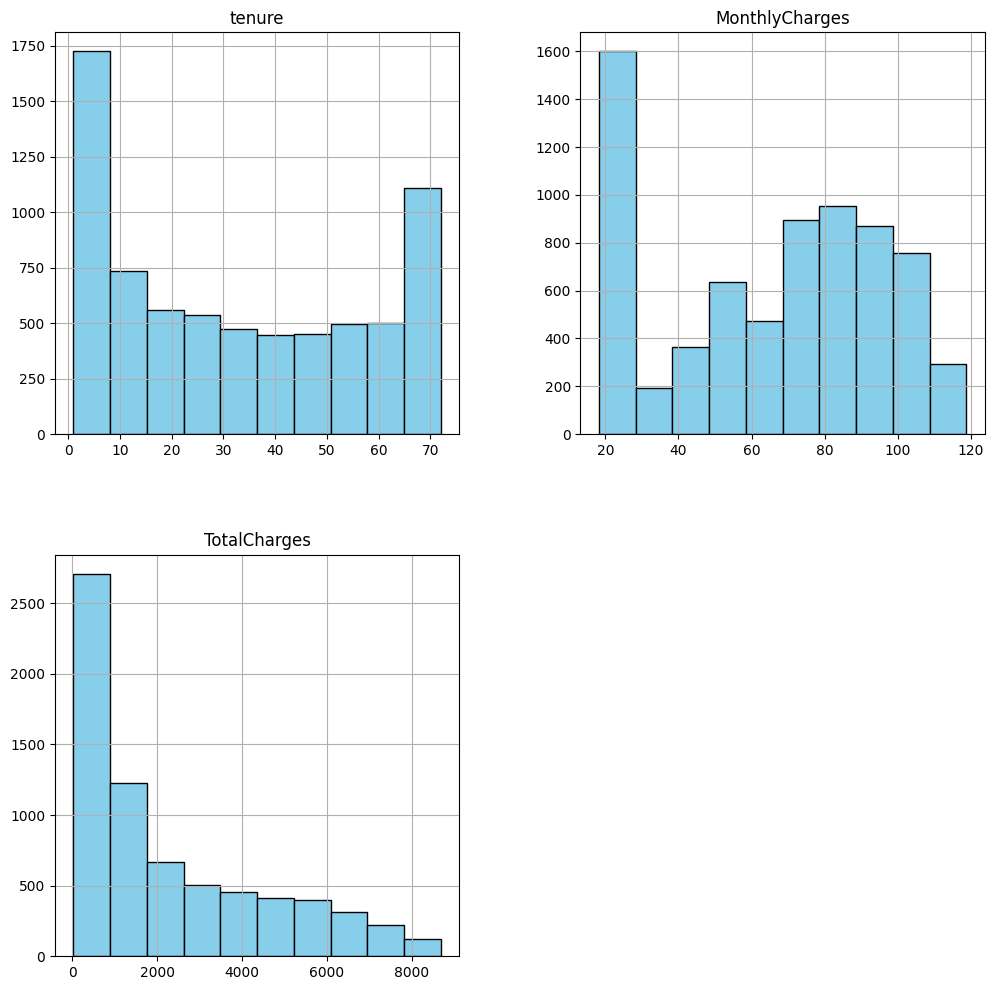

In [ ]:
df[num_cols].hist(edgecolor='black',figsize=(12,12), color='skyblue')

* Maximum tenure is of 1-8 months and 65-68 months (approx 5.5 years).
* Maximum montly charges are of Rs.19-30.
* Total charges is right skewed indicating maximum total charges given is from smaller amount to higher amount (with maximum is of Rs, 0-1000).

#### Count of categorical variable

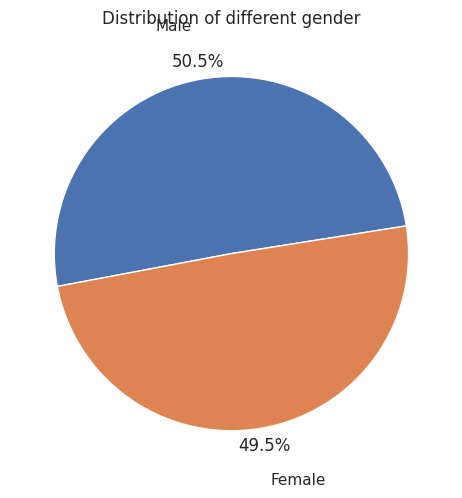

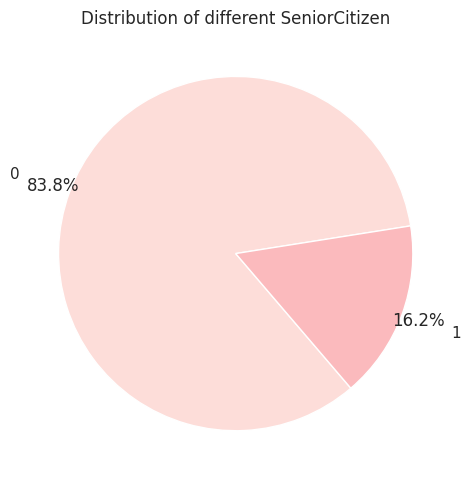

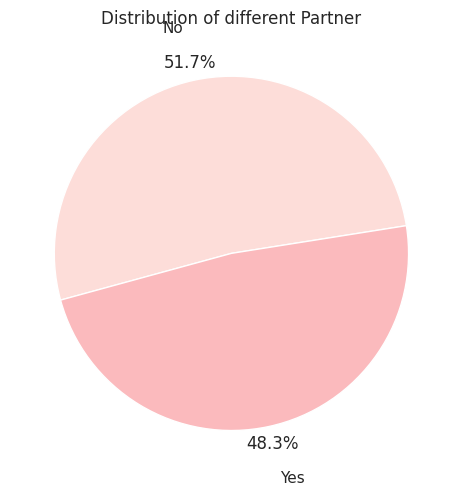

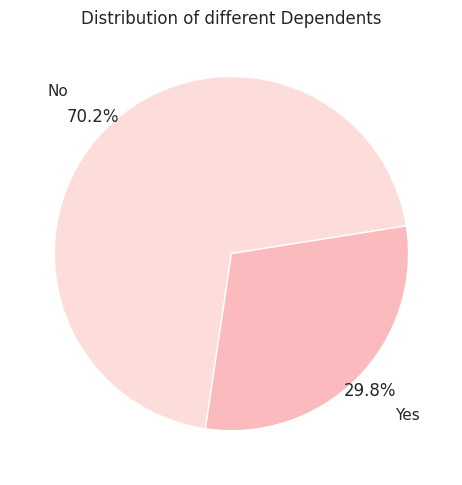

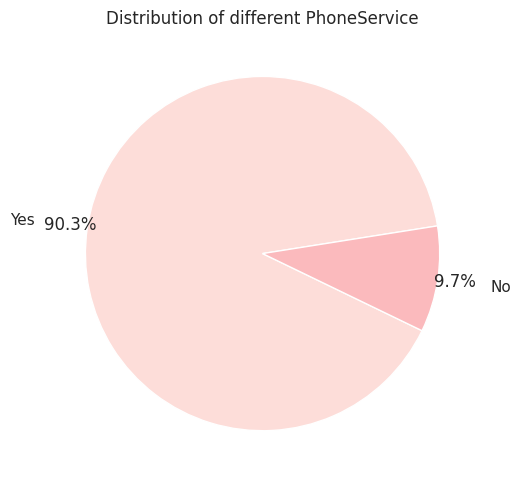

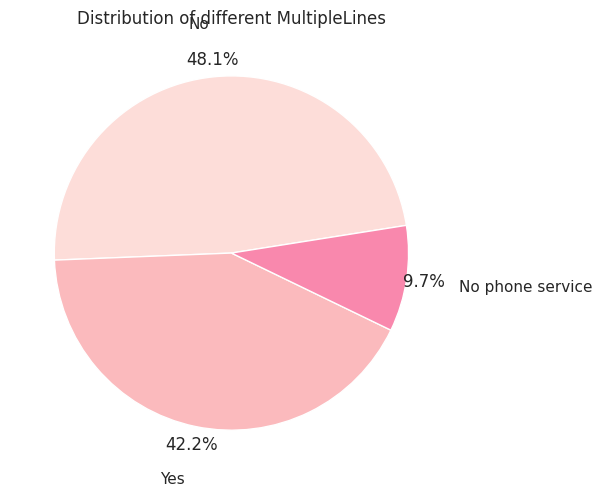

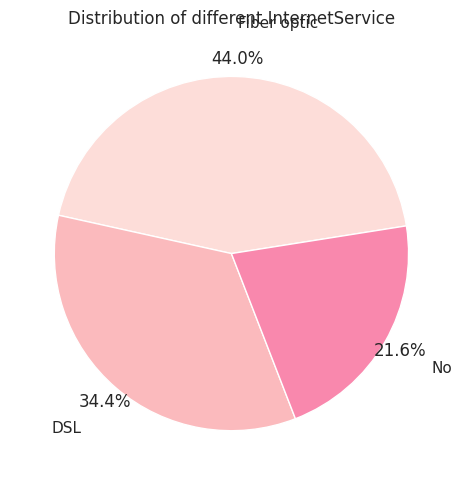

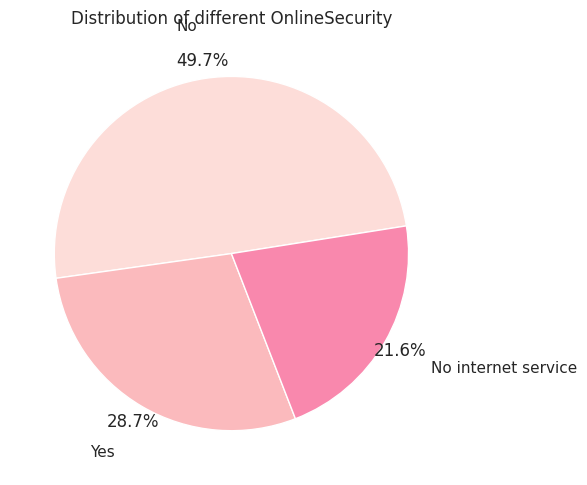

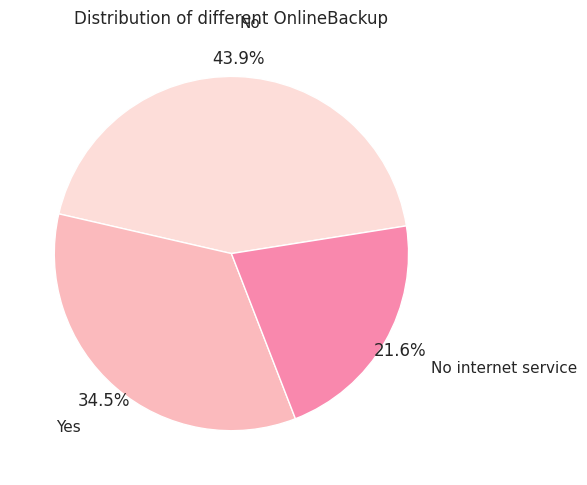

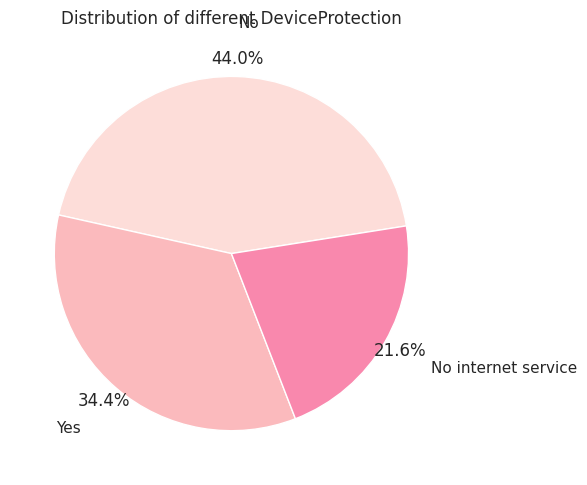

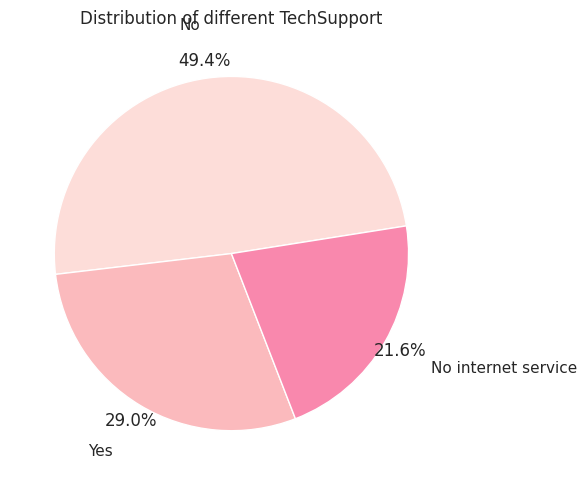

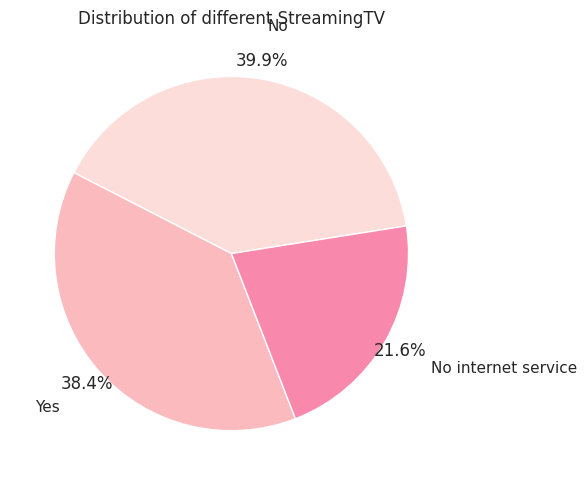

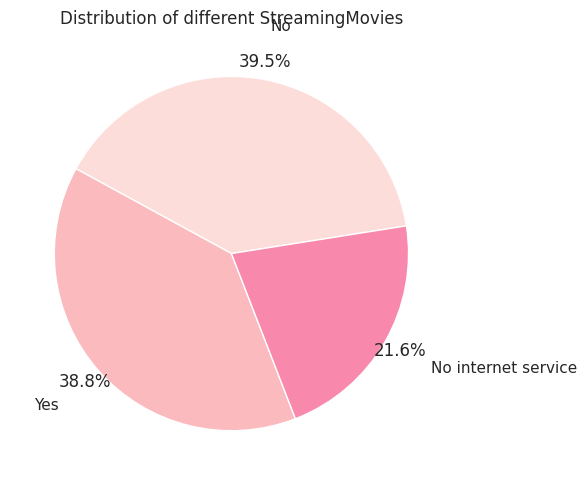

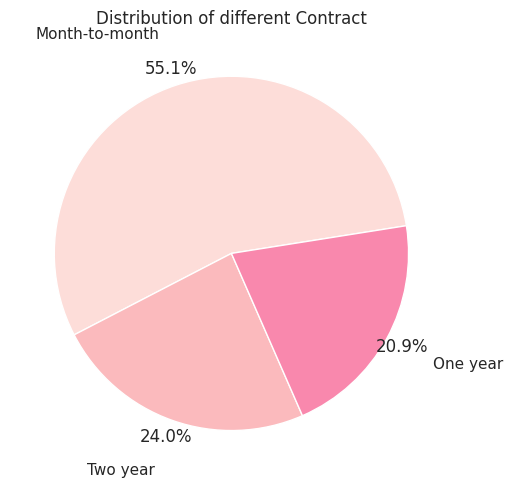

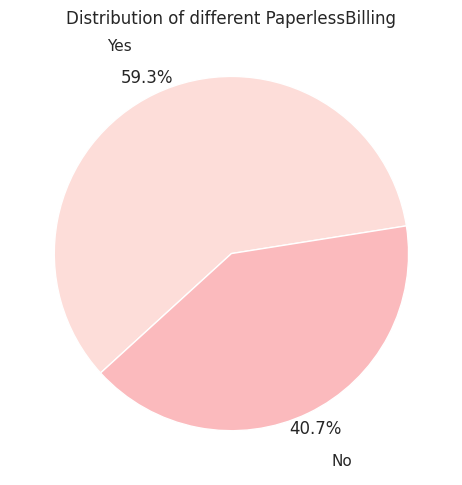

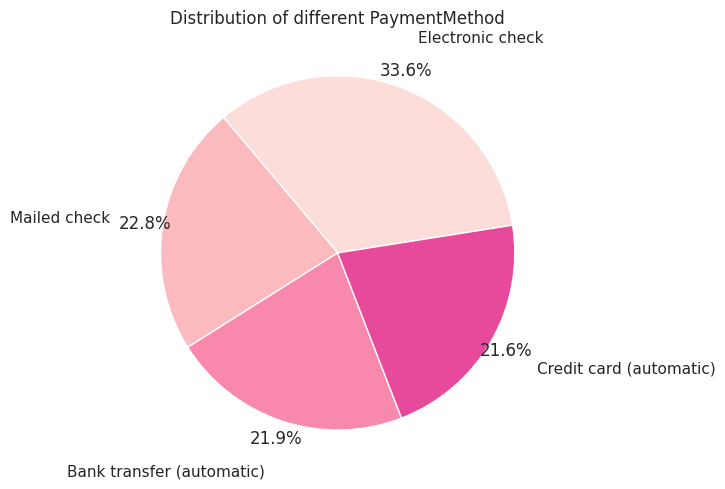

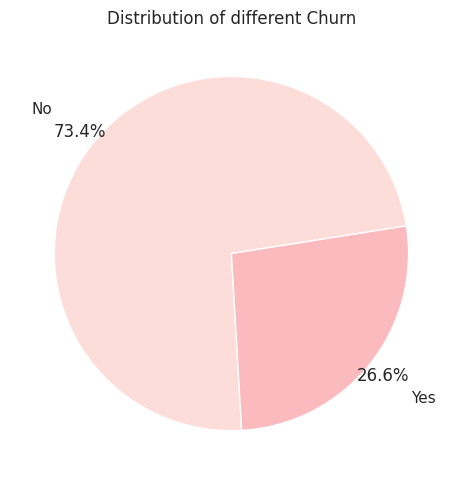

In [ ]:
sns.set(rc={'figure.figsize':(40,20)})
for i in enumerate(cat_cols):
  plt.subplot(3, 6, i[0]+1)
  sns.set_palette("RdPu")
  df1 = pd.DataFrame(df[i[1]].value_counts())
  labels = df1.index.tolist()
  sizes = df[i[1]].value_counts()
  plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, labeldistance=1.30,  pctdistance=1.1 )
  plt.title(f"Distribution of different {i[1]}")
  plt.plot()
  plt.show()

* Distribution of males and females are approx equal.
* We have 84% of data of Non-senior citizen.
* Distribution of partners is approx equal.
* We have 70% of customers who have no dependency on anyone.
* 90% of the customers have phone services
* Among those who have phone servics, 48% do not have multiple lines, 42% have multiple lines.
* 44% customers have fiber optic, 34% have DSL and 22% do not have internet service.
* Among those who have internet services (80%), 50% have no online security.
* Among those who have internet services (80%), 44% have no online backup.
* Among those who have internet services (80%), 44% have no device protection.
* Among those who have internet services (80%), 50% have no tech support.
* Among those who have internet services (80%), 40% do not stream TV.
* Among those who have internet services (80%), 40% do not stream movies.
* 55% have monthly contract, 21% have of one year and 24% have of 2 year.
* 60% use paperless billing.
* There is approx proportion of payment methods.
* 73.4% customers are not churning while 26.6 are churning.

####Mean of continuous feature towards in each churn category

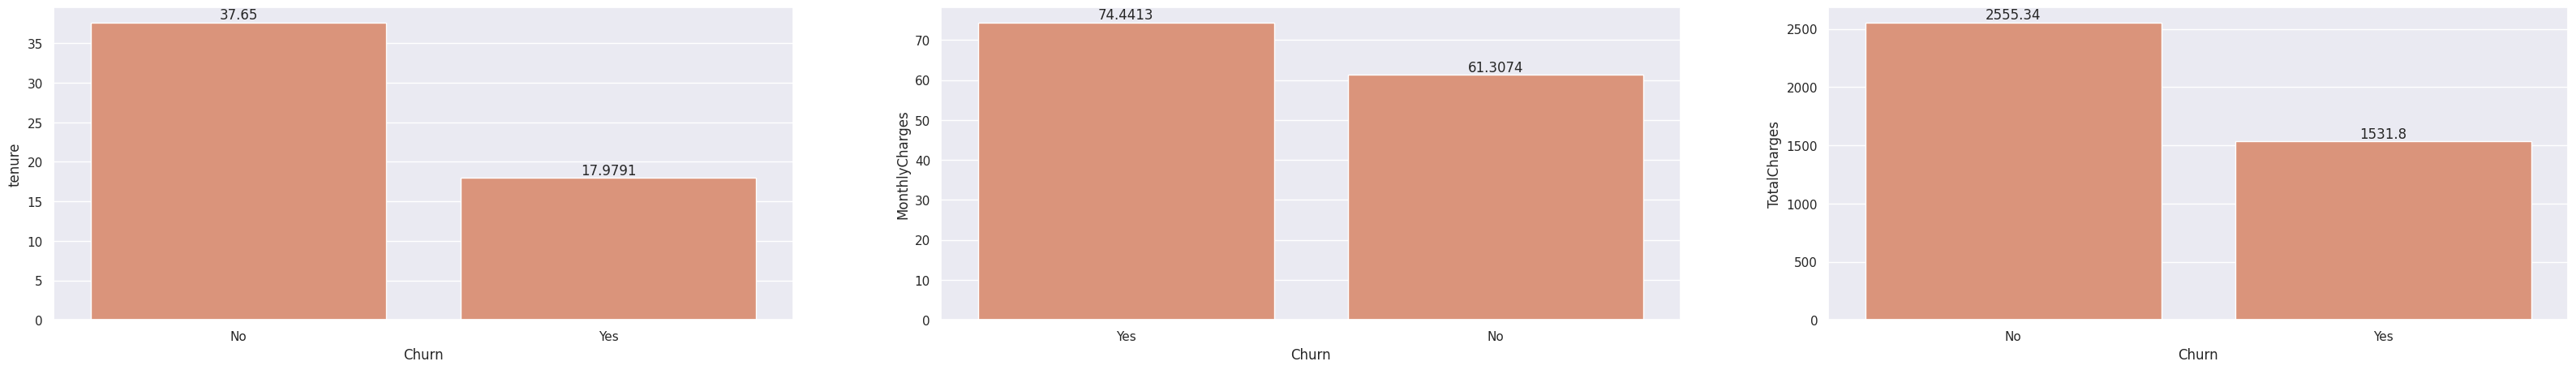

In [ ]:
sns.set(rc={'figure.figsize':(40,5)})
sns.set_palette("flare")

plt.subplots_adjust(hspace=0.8)
for i in enumerate(num_cols):
  plt.subplot(1, 3, i[0]+1)
  Data = df.groupby(['Churn'], as_index=False)[i[1]].mean().sort_values(by=i[1], ascending=False)
  ax = sns.barplot(x = 'Churn', y= i[1] ,data = Data)
  for bars in ax.containers:
    ax.bar_label(bars)

* Those who do not churn have an average tenure of 38 months (3 years) while those who do churn have an average tenure of 18 months (1.5 years).
* Those who do not churn have monthly charges of 74 while those who dont have 61.
* Those who do not churn have total charges of 2555 while those who do have 1532.

####Each category distribution count towards in churn category

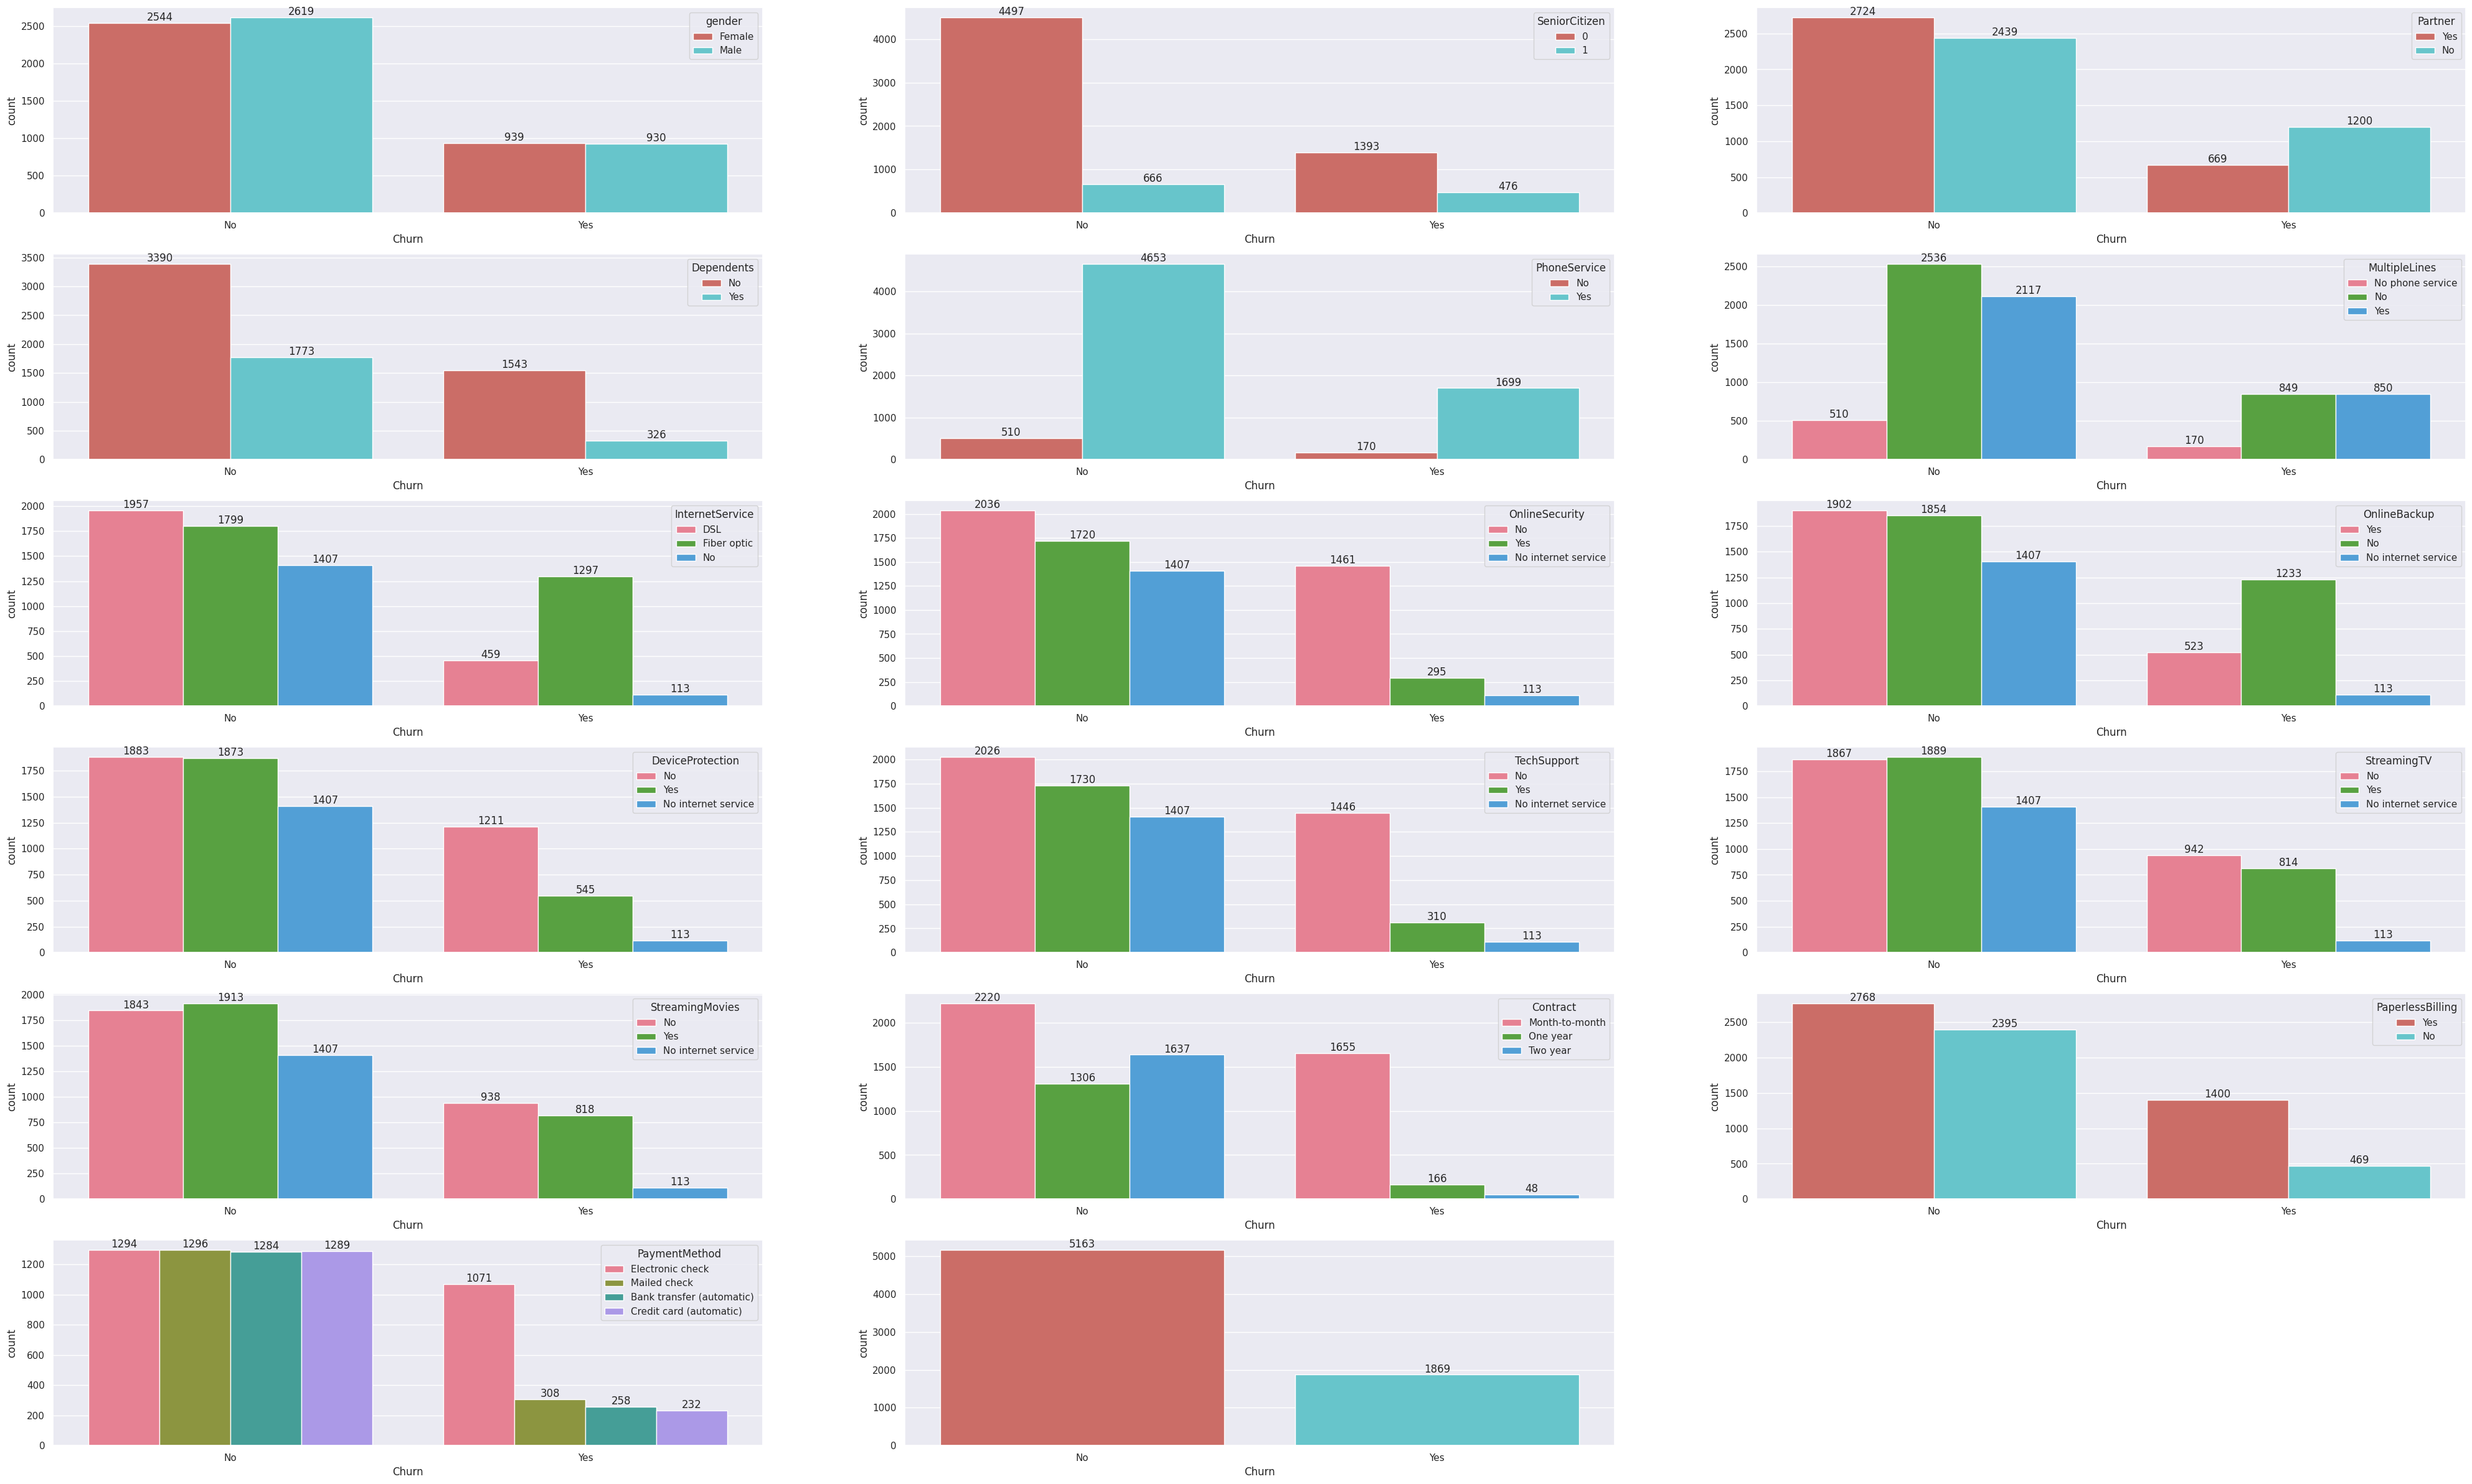

In [ ]:
sns.set(rc={'figure.figsize':(50,30)})
sns.set_palette("hls", 2)
for i in enumerate(cat_cols):
  plt.subplot(6, 3, i[0]+1)
  ax = sns.countplot(hue=i[1],x='Churn', data=df)
  for bars in ax.containers:
    ax.bar_label(bars)

* Males and females are equally tend to churn.
* Non senior citizens are more likely to churn
* Customers with no partner are more likely to churn while those with partner less likely to churn.
* Those customers who have and who don’t have multiple phone lines are equally likely to churn. While who have no multiple lines are more likely to not churn.
* Those who have fiber optic as internet service are more likely to churn. Those with DSL are more likely to not churn.
* Those who don’t have online security are more likely to churn. From those who didn’t churn, there are more people who didn’t have online security than those who have but with a small margin.
* Customers with no online backup are more likely to churn.
* Customers without device protection are more likely to churn.
* Customers without tech support are more likely to churn.
* Among those who churned, customers with monthly contract are more likely to churn. Among those who did not churn, customers with monthly contract are highest, second comes those with 2 year and third comes with 1 year contract.
* People with paperless billing are more likely to churn.
* Customers who opts for electronic check are more likely to churn.


####Heatmap

<ipython-input-21-429b352f785b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Correlation_Heatmap = sns.heatmap(df.corr(), cmap='coolwarm', annot=True)


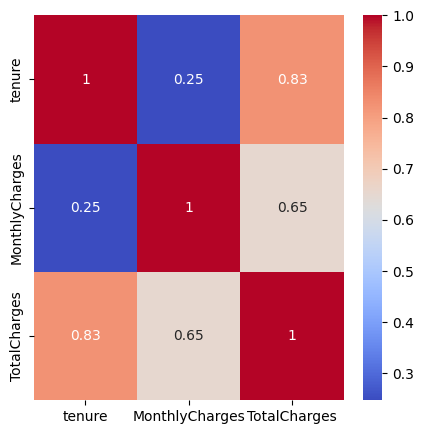

In [ ]:
fig = plt.figure(figsize =(5, 5))
Correlation_Heatmap = sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

* We could see that tenure have high correlation with total charges. (83%)
* Monthly charges and total charges have 65% correlation.

####Tenure vs Mothly and yearly charges

<Axes: xlabel='tenure', ylabel='TotalCharges'>

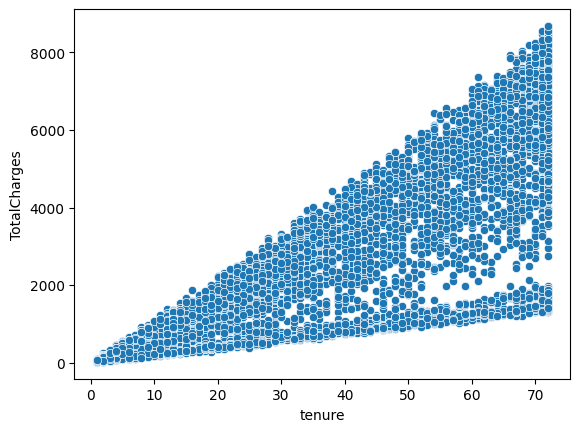

In [ ]:
sns.scatterplot(x = 'tenure', y = 'TotalCharges', data = df)

<Axes: xlabel='tenure', ylabel='MonthlyCharges'>

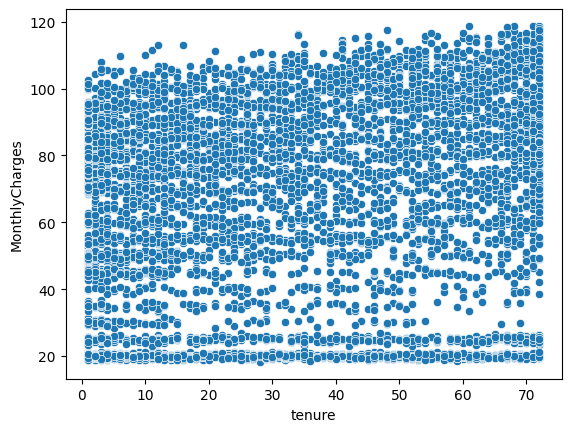

In [ ]:
sns.scatterplot(x = 'tenure', y = 'MonthlyCharges', data = df)

#### Contract vs tenure and paperless billing

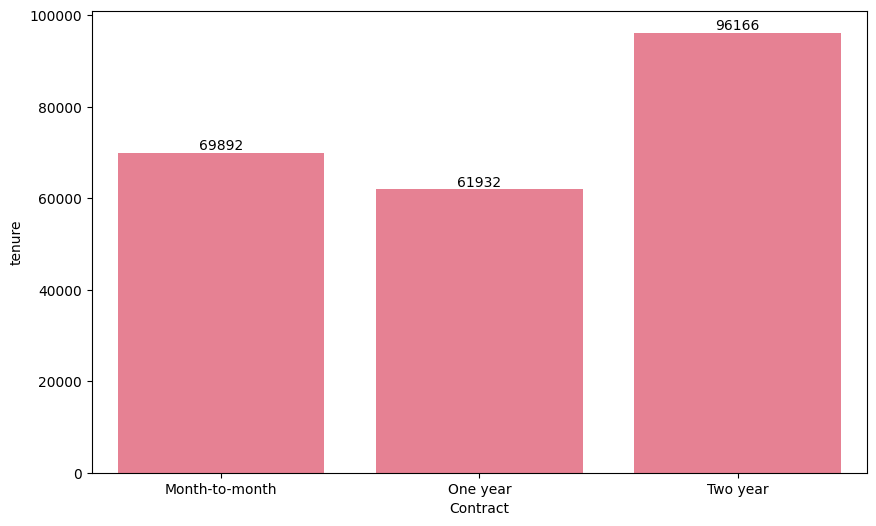

In [ ]:
plt.figure(figsize = (10,6))
sns.set_palette('husl')
data = df.groupby(['Contract'], as_index = False)['tenure'].sum()
ax = sns.barplot(x = 'Contract', y = 'tenure', data = data )
for bar in ax.containers:
  ax.bar_label(bar)

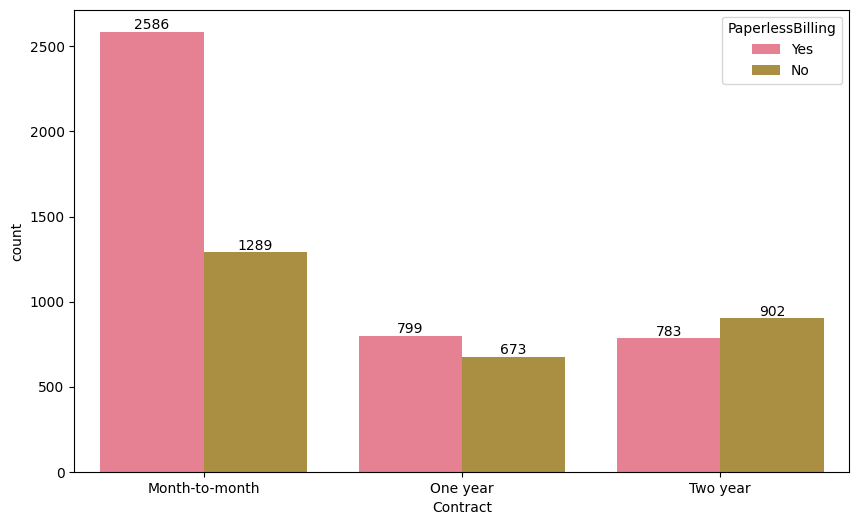

In [ ]:
plt.figure(figsize = (10,6))
sns.set_palette('husl')
ax = sns.countplot(hue = 'PaperlessBilling', x='Contract', data=df)
for bar in ax.containers:
  ax.bar_label(bar)

#### Internet service

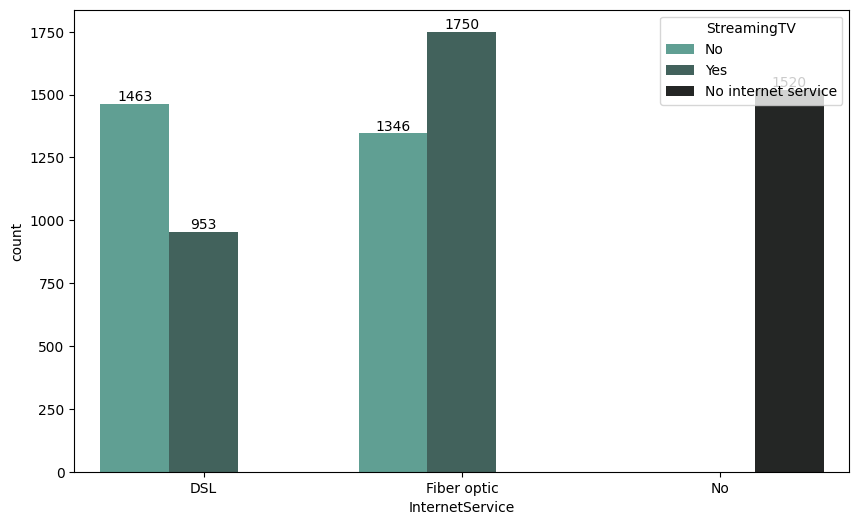

In [ ]:
plt.figure(figsize = (10,6))
sns.set_palette('dark:#5A9_r', 3)
ax = sns.countplot(hue = 'StreamingTV', x='InternetService', data=df)
for bar in ax.containers:
  ax.bar_label(bar)

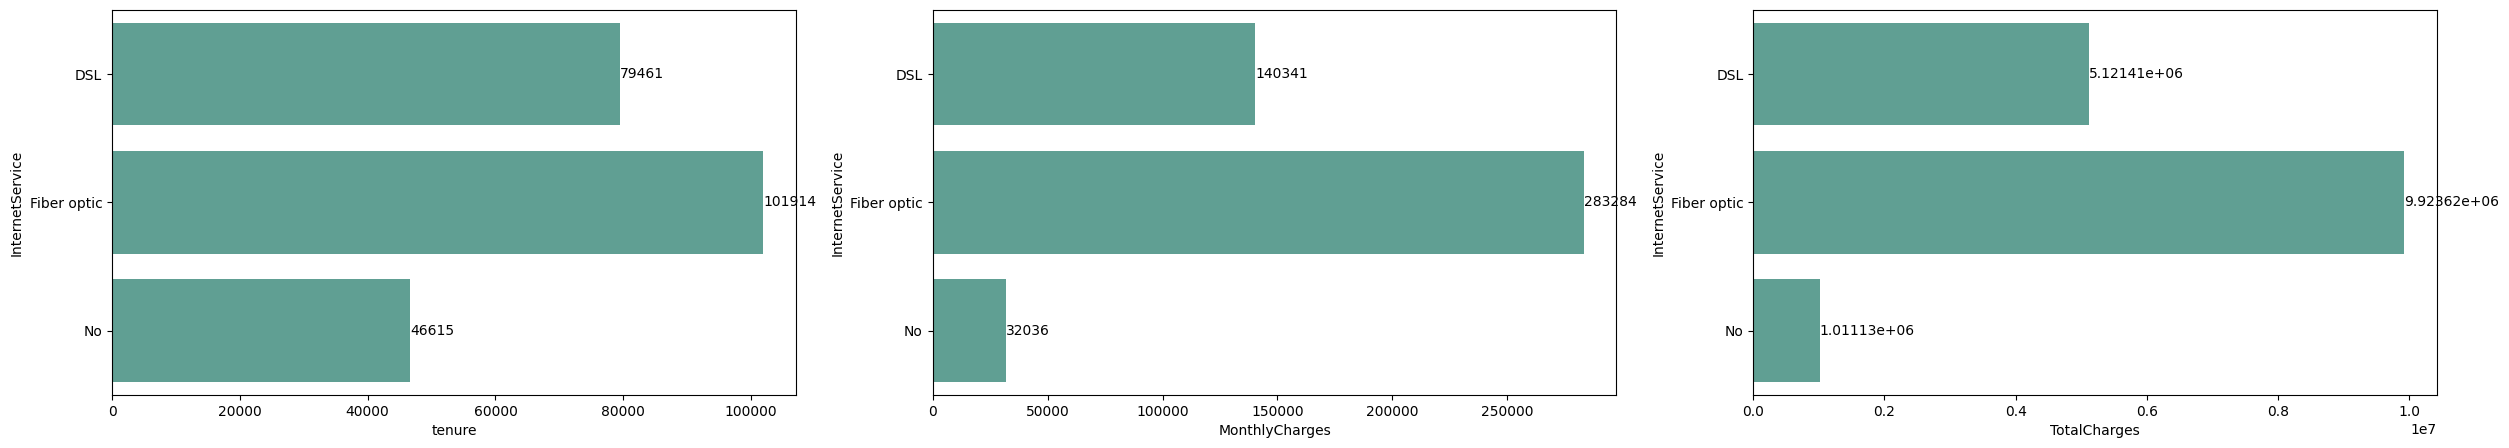

In [ ]:
plt.figure(figsize = (30,5))
plt.subplots_adjust(hspace=0.8)
for i in enumerate(num_cols):
  plt.subplot(1, 3, i[0]+1)
  Data = df.groupby(['InternetService'], as_index=False)[i[1]].sum()
  ax = sns.barplot(y = 'InternetService', x= i[1] ,data = Data)
  for bars in ax.containers:
    ax.bar_label(bars)

#### Senior citizen

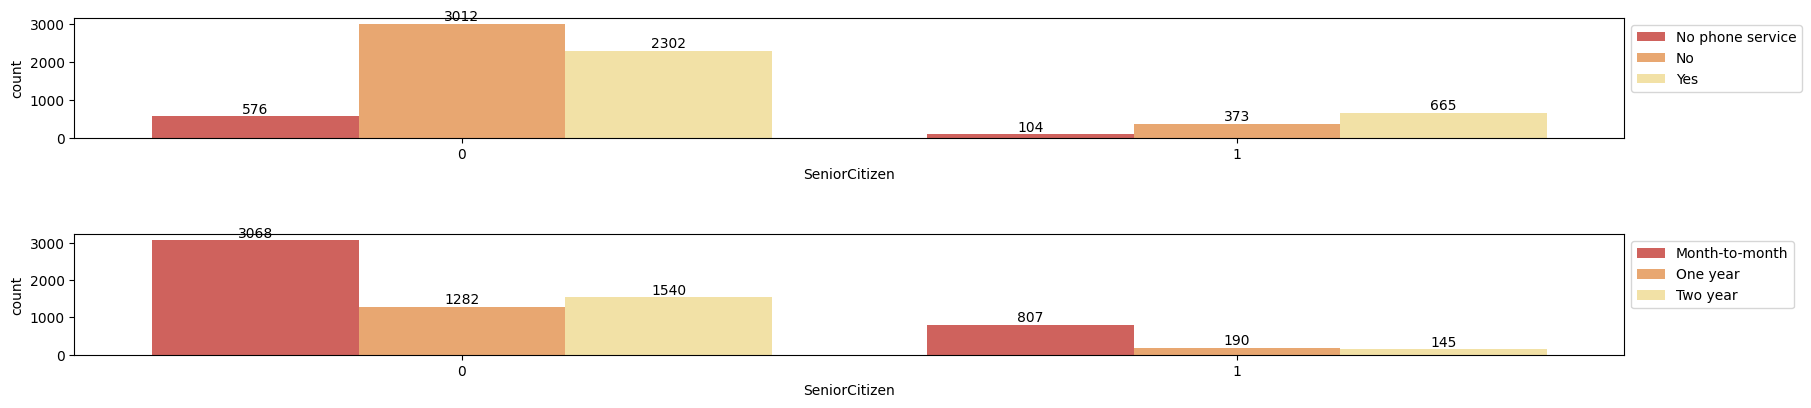

In [ ]:
plt.figure(figsize = (20,10))
plt.subplots_adjust(hspace=0.8)
sns.set_palette('Spectral')
cols = ['MultipleLines', 'Contract']
for i in enumerate(cols):
  plt.subplot(4, 1, i[0]+1)
  ax = sns.countplot(hue=i[1],x='SeniorCitizen', data=df)
  for bars in ax.containers:
    ax.bar_label(bars)
  plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

### Preprocessing

####Outliers Detection

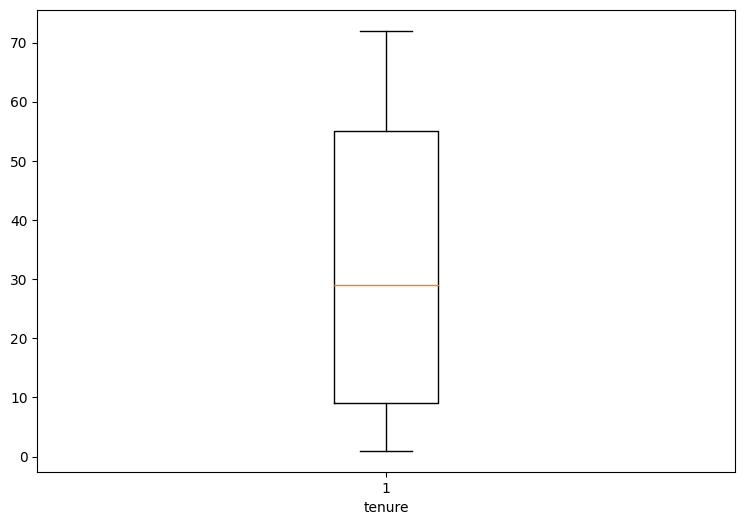

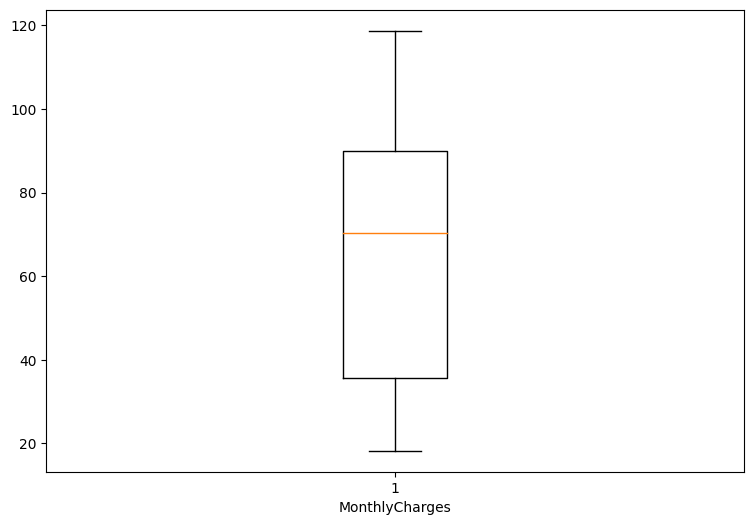

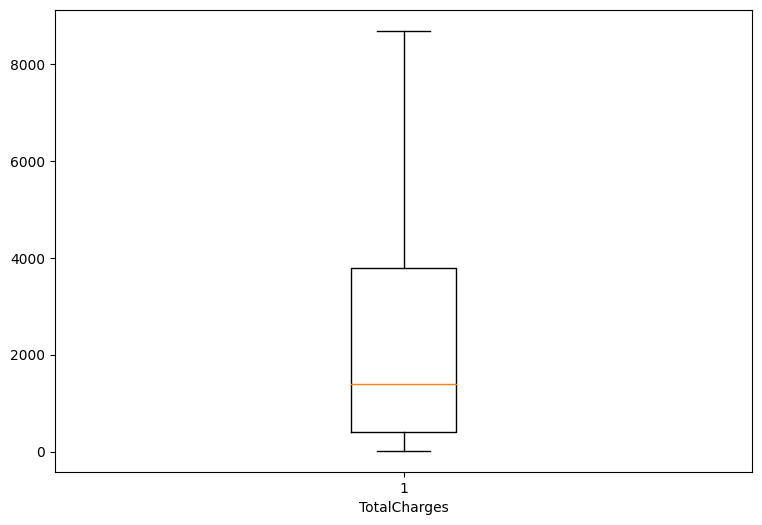

In [16]:
for col in num_cols:
  plt.figure(figsize=(9, 6))
  plt.boxplot(df[col])
  plt.xlabel(col)
  plt.show()

There are no outliers in continuous variables available in the data.

#### Encoding

In [51]:
df_copy = df.copy()

In [52]:
encoder = LabelEncoder()
for col in cat_cols:
  df_copy[col] = encoder.fit_transform(df_copy[col])

df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


#### Feature Selection

In [22]:
X = df_copy[['tenure', 'MonthlyCharges', 'TotalCharges']]

def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["feature"] = dataframe.columns

    # Calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(len(dataframe.columns))]
    return vif_data

vif_sample_df = calculate_vif(X)

vif_sample_df

,feature,VIF
0,tenure,6.332432
1,MonthlyCharges,3.361075
2,TotalCharges,8.079181


VIP scores shows that there is no multicollinearity in our continuous variables.

In [24]:
X = df_copy.drop(['Churn', 'tenure', 'MonthlyCharges', 'TotalCharges'], axis='columns')
y = df_copy['Churn']

ft1 = SelectKBest(chi2, k = 10).fit(X, y)
data1 = {'Columns': X.columns.tolist(), 'Score': ft1.scores_.tolist()}

# Create DataFrame
df_score1 = pd.DataFrame(data1)
print(df_score1.sort_values(by=['Score'], ascending=False))

print('---------------------------------------------------------')
X = df_copy.drop(['Churn'], axis='columns')

ft2 = SelectKBest(mutual_info_classif, k= 10).fit(X, y)
data2 = {'Columns': X.columns.tolist(), 'Score': ft2.scores_.tolist()}

# Create DataFrame
df_score2 = pd.DataFrame(data2)
print(df_score2.sort_values(by=['Score'], ascending=False))

             Columns        Score
13          Contract  1111.759054
7     OnlineSecurity   550.437364
10       TechSupport   522.164716
8       OnlineBackup   229.441123
9   DeviceProtection   190.688004
1      SeniorCitizen   133.482766
3         Dependents   131.271509
14  PaperlessBilling   104.979224
2            Partner    81.857769
15     PaymentMethod    59.240507
5      MultipleLines     9.735960
6    InternetService     9.715269
12   StreamingMovies     8.357624
11       StreamingTV     7.373234
0             gender     0.254297
4       PhoneService     0.092948
---------------------------------------------------------
             Columns     Score
14          Contract  0.098801
4             tenure  0.078760
8     OnlineSecurity  0.069923
11       TechSupport  0.058516
7    InternetService  0.055634
9       OnlineBackup  0.052880
10  DeviceProtection  0.050919
18      TotalCharges  0.044245
17    MonthlyCharges  0.040724
16     PaymentMethod  0.040590
12       StreamingTV  0

In [ ]:
X = df_copy.drop(['Churn'], axis='columns')
y = df_copy['Churn']
SS = StandardScaler()
X_SS = SS.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_SS, y, train_size=0.8, random_state = 0, stratify=y)

In [27]:
estimator = LogisticRegression()
selector = RFE(estimator, n_features_to_select=10, step=1)
selector.fit(X_SS, y)
Logistic_ranks = selector.ranking_

estimator = RandomForestClassifier()
selector = RFE(estimator, n_features_to_select=10, step=1)
selector.fit(X_SS, y)
Random_forest_ranks = selector.ranking_

estimator = GradientBoostingClassifier()
selector = RFE(estimator, n_features_to_select=10, step=1)
selector.fit(X_SS, y)
Gradient_boost_ranks = selector.ranking_

estimator = XGBClassifier()
selector = RFE(estimator, n_features_to_select=10, step=1)
selector.fit(X_SS, y)
XGB_ranks = selector.ranking_

estimator = CatBoostClassifier(logging_level='Silent')
selector = RFE(estimator, n_features_to_select=10, step=1)
selector.fit(X_SS, y)
CATBoost_ranks = selector.ranking_

estimator = LGBMClassifier(verbose= -100)
selector = RFE(estimator, n_features_to_select=10, step=1)
selector.fit(X_SS, y)
LightBoost_ranks = selector.ranking_

data = {'Columns': list(X.columns), 'Logistic_Rank': list(Logistic_ranks), 'RandomForest_Rank': list(Random_forest_ranks),
        'Gradient_Rank': list(Gradient_boost_ranks), 'XGB_Rank': list(XGB_ranks), 'CatBoost_Rank': list(CATBoost_ranks),
        'LGBM_Rank': list(LightBoost_ranks)}
df = pd.DataFrame(data)
df

,Columns,Logistic_Rank,RandomForest_Rank,Gradient_Rank,XGB_Rank,CatBoost_Rank,LGBM_Rank
0,tenure,1,1,1,1,1,1
1,PhoneService,1,3,3,1,3,2
2,MultipleLines,2,2,1,2,1,1
3,InternetService,1,1,1,1,1,3
4,OnlineSecurity,1,1,1,1,1,1
5,OnlineBackup,1,1,2,1,2,1
6,TechSupport,1,1,1,1,1,1
7,Contract,1,1,1,1,1,1
8,PaperlessBilling,1,1,1,1,1,1
9,PaymentMethod,3,1,1,3,1,1


In [58]:
X = df_copy.drop(['Churn', 'SeniorCitizen', 'Partner','Dependents','DeviceProtection',
 'gender', 'StreamingTV', 'StreamingMovies'], axis='columns')
y = df_copy['Churn']
SS = StandardScaler()
X_SS = SS.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_SS, y, train_size=0.75, random_state = 0, stratify=y)

estimators = [LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier(), XGBClassifier(), CatBoostClassifier(logging_level='Silent'), LGBMClassifier(verbose= -100)]
for est in estimators:
  model = est
  model.fit(X_train, y_train)
  val_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, val_pred)
  print(est)
  print('Accuracy of', est, 'is', accuracy)
  print(classification_report(y_test, val_pred))
  print('-----------------------------------------------------')

LogisticRegression()
Accuracy of LogisticRegression() is 0.8077360637087599
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1291
           1       0.68      0.52      0.59       467

    accuracy                           0.81      1758
   macro avg       0.76      0.72      0.73      1758
weighted avg       0.80      0.81      0.80      1758

-----------------------------------------------------
RandomForestClassifier()
Accuracy of RandomForestClassifier() is 0.7861205915813424
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1291
           1       0.64      0.46      0.53       467

    accuracy                           0.79      1758
   macro avg       0.73      0.68      0.70      1758
weighted avg       0.77      0.79      0.77      1758

-----------------------------------------------------
GradientBoostingClassifier()
Accuracy of GradientBoostingClassifier() is 0.811

In [19]:
def modelfit(classifier, X_train, y_train, X_test, y_test):
  classifier.fit(X_train, y_train)
  val_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test, val_pred)
  y_train_pred = classifier.predict(X_train)
  accuracy_y_train = classifier.score(X_train,y_train)
  cvs = cross_val_score(classifier, X, y, cv=10, scoring='accuracy').mean()
  print('Accuracy on val data', accuracy )
  print('Accuracy on train data', accuracy_y_train )
  print(classification_report(y_test, val_pred))
  print("CVscore:", cvs)

###ML Models

####Logistic Regression

In [24]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

from warnings import filterwarnings
filterwarnings('ignore')

In [30]:
logistic = LogisticRegression()
modelfit(logistic, X_train, y_train, X_test, y_test)

Accuracy on val data 0.8077360637087599
Accuracy on train data 0.7999620781190747
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1291
           1       0.68      0.52      0.59       467

    accuracy                           0.81      1758
   macro avg       0.76      0.72      0.73      1758
weighted avg       0.80      0.81      0.80      1758

CVscore: 0.7992012721453511


In [37]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'None'],  # Penalty type: L1 or L2 regularization
    'C' : np.logspace(-4, 4, 20),                   # Regularization strength
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [50,70,100, 200]}

grid = GridSearchCV(LogisticRegression(random_state=0), param_grid= param_grid, n_jobs=None)

# Fit the Algorithm
grid.fit(X_train, y_train)

# Predict on the model
y_train_pred_grid = grid.predict(X_train)
y_test_pred_grid = grid.predict(X_test)

# Retrieve the best hyperparameters and best score
best_params = print('best param:',grid.best_params_)
best_score = print('best score:',grid.best_score_)

best param: {'C': 0.012742749857031334, 'max_iter': 50, 'penalty': 'l2', 'solver': 'lbfgs'}
best score: 0.8026153583280126


Text(0.5, 1.0, 'Feature importances for Logistic Regression')

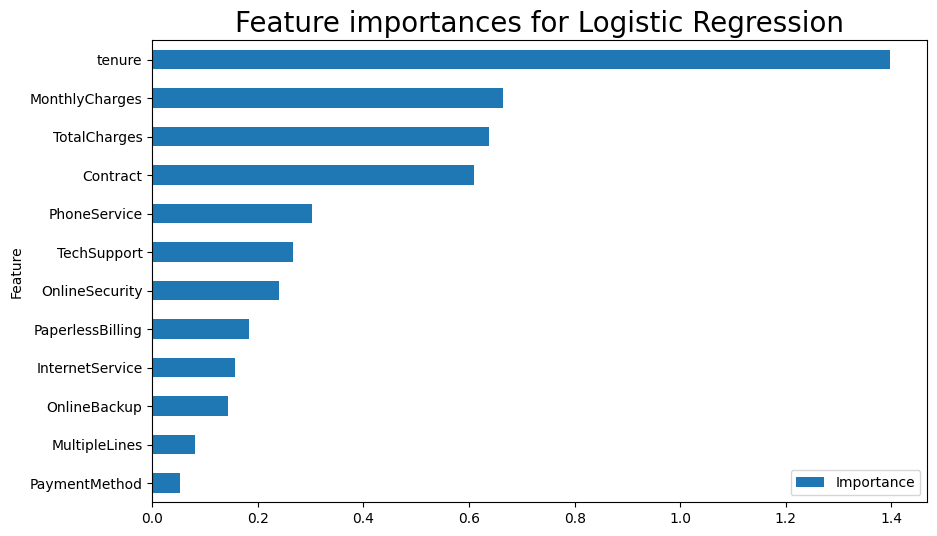

In [32]:
coefficients = logistic.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))


# Set title for the chart
plt.title('Feature importances for Logistic Regression', size=20)

In [54]:
logistic_final = LogisticRegression(C= 0.012742749857031334, max_iter= 50, penalty = 'l2', solver= 'lbfgs')
modelfit(logistic_final, X_train, y_train, X_test, y_test)

Accuracy on val data 0.8117178612059158
Accuracy on train data 0.8003412969283277
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1291
           1       0.71      0.49      0.58       467

    accuracy                           0.81      1758
   macro avg       0.77      0.71      0.73      1758
weighted avg       0.80      0.81      0.80      1758

CVscore: 0.7910953866545972


#### Random Forest

In [21]:
random_forest = RandomForestClassifier()
modelfit(random_forest, X_train, y_train, X_test, y_test)

Accuracy on val data 0.7781569965870307
Accuracy on train data 0.9963974213120971
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1291
           1       0.61      0.46      0.52       467

    accuracy                           0.78      1758
   macro avg       0.72      0.68      0.69      1758
weighted avg       0.76      0.78      0.77      1758

CVscore: 0.7861167237811975


In [ ]:
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],  # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]  # Method of selecting samples for training each tree
}

rscv = RandomizedSearchCV(RandomForestClassifier(random_state=0), param_grid, verbose=3, n_jobs=1)

# Fit the Algorithm
rscv.fit(X_train, y_train)

# Predict on the model
y_train_pred_grid = rscv.predict(X_train)
y_test_pred_grid = rscv.predict(X_test)

# Retrieve the best hyperparameters and best score
best_params = print('best param:',rscv.best_params_)
best_score = print('best score:',rscv.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.795 total time=   1.8s
[CV 2/5] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.816 total time=   1.8s
[CV 3/5] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.780 total time=   2.3s
[CV 4/5] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.788 total time=   3.5s
[CV 5/5] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.789 total time=   1.7s
[CV 1/5] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1400;, score=0.790 total time=  13.0s
[CV 2/5] END b

In [44]:
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],  # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]  # Method of selecting samples for training each tree
}

rscv = RandomizedSearchCV(RandomForestClassifier(random_state=0), param_grid, n_jobs=1)

# Fit the Algorithm
rscv.fit(X_train, y_train)

# Predict on the model
y_train_pred_grid = rscv.predict(X_train)
y_test_pred_grid = rscv.predict(X_test)

# Retrieve the best hyperparameters and best score
best_params = print('best param:',rscv.best_params_)
best_score = print('best score:',rscv.best_score_)

best param: {'n_estimators': 2000, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 110, 'bootstrap': True}
best score: 0.7967367824671528


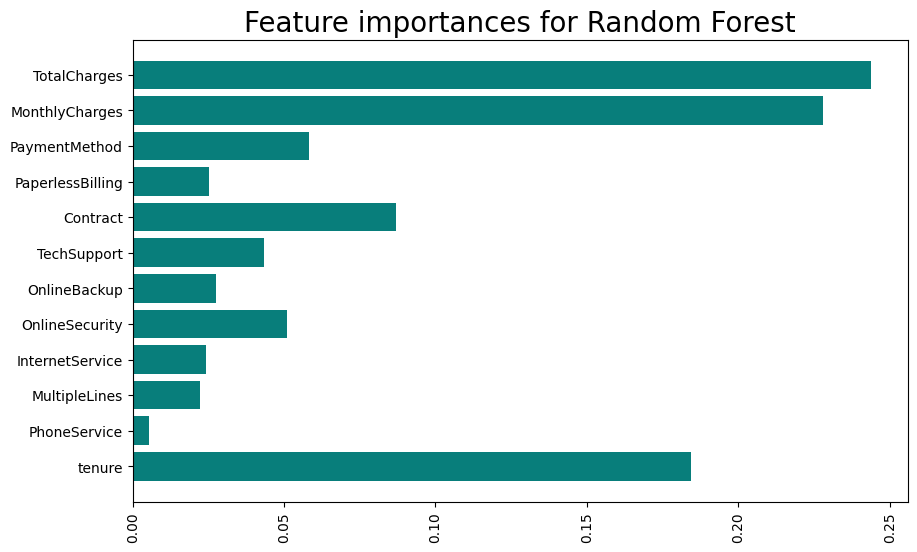

In [22]:
# Get features according to their importance in prediction
features = X.columns

# Get feature importances using random forest model
importances = random_forest.feature_importances_


indices = np.argsort(importances)
plt.figure(figsize=(10,6))
plt.barh(y=features, width=importances, color='#087E7B')
plt.title('Feature importances for Random Forest', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [55]:
random_forest_final = RandomForestClassifier(n_estimators =  800, min_samples_split = 10, min_samples_leaf = 4, max_features = 'auto', max_depth = 80, bootstrap = True)
modelfit(random_forest_final, X_train, y_train, X_test, y_test)

Accuracy on val data 0.800910125142207
Accuracy on train data 0.8752370117557831
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1291
           1       0.68      0.48      0.56       467

    accuracy                           0.80      1758
   macro avg       0.75      0.70      0.72      1758
weighted avg       0.79      0.80      0.79      1758

CVscore: 0.8009058175998964


#### Gradient Boosting

In [26]:
gbc = GradientBoostingClassifier()
modelfit(gbc, X_train, y_train, X_test, y_test)

Accuracy on val data 0.8111490329920364
Accuracy on train data 0.8270762229806599
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1291
           1       0.70      0.51      0.59       467

    accuracy                           0.81      1758
   macro avg       0.77      0.71      0.73      1758
weighted avg       0.80      0.81      0.80      1758

CVscore: 0.8043229907539118


In [ ]:
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],  # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
}

grid = RandomizedSearchCV(GradientBoostingClassifier(random_state=0),  param_dist, verbose=3, n_jobs=1)

# Fit the Algorithm
grid.fit(X_train, y_train)

# Predict on the model
y_train_pred_grid = grid.predict(X_train)
y_test_pred_grid = grid.predict(X_test)

# Retrieve the best hyperparameters and best score
best_params = print('best param:',grid.best_params_)
best_score = print('best score:',grid.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000;, score=0.774 total time= 1.5min
[CV 2/5] END max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000;, score=0.787 total time= 1.7min
[CV 3/5] END max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000;, score=0.760 total time= 1.5min
[CV 4/5] END max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000;, score=0.762 total time= 1.6min
[CV 5/5] END max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000;, score=0.765 total time= 1.6min
[CV 1/5] END max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400;, score=0.778 total time=  20.0s
[CV 2/5] END max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400;, scor

In [28]:
gbc_final = GradientBoostingClassifier(n_estimators = 400, max_features = 'auto', max_depth = 90, min_samples_split = 5, min_samples_leaf = 4, random_state = 42 )
modelfit(gbc_final, X_train, y_train, X_test, y_test)

Accuracy on val data 0.7764505119453925
Accuracy on train data 0.9963974213120971
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1291
           1       0.60      0.46      0.52       467

    accuracy                           0.78      1758
   macro avg       0.71      0.68      0.69      1758
weighted avg       0.76      0.78      0.77      1758

CVscore: 0.7728957875339455


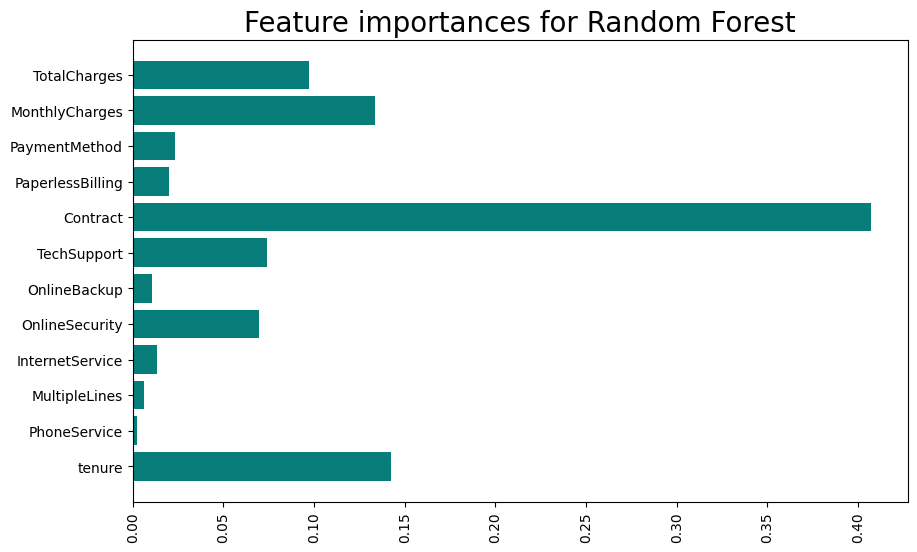

In [27]:
# Get features according to their importance in prediction
features = X.columns

# Get feature importances using random forest model
importances = gbc.feature_importances_

indices = np.argsort(importances)
plt.figure(figsize=(10,6))
plt.barh(y=features, width=importances, color='#087E7B')
plt.title('Feature importances for Random Forest', size=20)
plt.xticks(rotation='vertical')
plt.show()

####XGBoost

In [29]:
xgb = XGBClassifier()
modelfit(xgb, X_train, y_train, X_test, y_test)

Accuracy on val data 0.7798634812286689
Accuracy on train data 0.9292756920743269
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1291
           1       0.61      0.49      0.54       467

    accuracy                           0.78      1758
   macro avg       0.72      0.69      0.70      1758
weighted avg       0.77      0.78      0.77      1758

CVscore: 0.7846966733479892


In [ ]:
param_dist = {
'n_estimators': [100,250,500,750],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8,],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

grid = GridSearchCV(XGBClassifier(random_state=0), param_grid= param_dist, verbose=3, n_jobs=-1)

# Fit the Algorithm
grid.fit(X_train, y_train)

# Predict on the model
y_train_pred_grid = grid.predict(X_train)
y_test_pred_grid = grid.predict(X_test)

# Retrieve the best hyperparameters and best score
best_params = print('best param:',grid.best_params_)
best_score = print('best score:',grid.best_score_)

Fitting 5 folds for each of 7776 candidates, totalling 38880 fits
best param: {'colsample_bytree': 0.8, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 0.5, 'subsample': 0.6}
best score: 0.805080352887218


In [32]:
xgb_final = XGBClassifier(colsample_bytree= 0.8, gamma= 0.2, learning_rate= 0.1, max_depth= 3, min_child_weight= 5, n_estimators= 100, reg_alpha= 0, reg_lambda= 0.5, subsample= 0.6, random_state = 42)
modelfit(xgb_final, X_train, y_train, X_test, y_test)

Accuracy on val data 0.8054607508532423
Accuracy on train data 0.8200606750094804
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1291
           1       0.67      0.52      0.59       467

    accuracy                           0.81      1758
   macro avg       0.76      0.71      0.73      1758
weighted avg       0.80      0.81      0.80      1758

CVscore: 0.8065959200827623


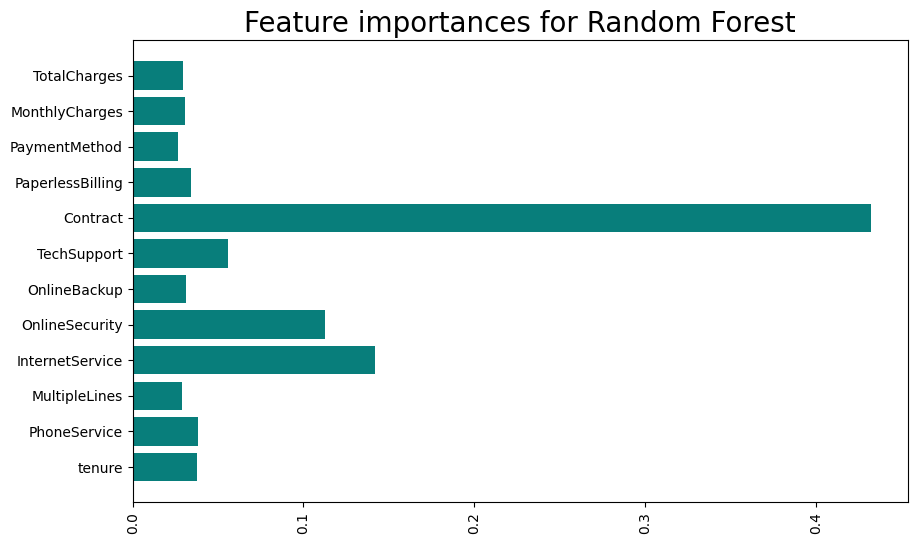

In [30]:
# Get features according to their importance in prediction
features = X.columns

# Get feature importances using random forest model
importances = xgb.feature_importances_

indices = np.argsort(importances)
plt.figure(figsize=(10,6))
plt.barh(y=features, width=importances, color='#087E7B')
plt.title('Feature importances for Random Forest', size=20)
plt.xticks(rotation='vertical')
plt.show()

####CatBoost

In [33]:
cbc = CatBoostClassifier(logging_level='Silent')
modelfit(cbc, X_train, y_train, X_test, y_test)

Accuracy on val data 0.8054607508532423
Accuracy on train data 0.8617747440273038
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1291
           1       0.68      0.50      0.58       467

    accuracy                           0.81      1758
   macro avg       0.76      0.71      0.72      1758
weighted avg       0.79      0.81      0.79      1758

CVscore: 0.7993437217121427


In [35]:
param_dist = {
'learning_rate': [0.01, 0.05, 0.03],
    'depth': [3, 5, 7],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'iterations': [100, 150, 200],
}

grid = GridSearchCV(CatBoostClassifier(logging_level='Silent'), param_grid= param_dist, n_jobs=1)

# Fit the Algorithm
grid.fit(X_train, y_train)

# Predict on the model
y_train_pred_grid = grid.predict(X_train)
y_test_pred_grid = grid.predict(X_test)

# Retrieve the best hyperparameters and best score
best_params = print('best param:',grid.best_params_)
best_score = print('best score:',grid.best_score_)

best param: {'depth': 5, 'iterations': 200, 'l2_leaf_reg': 9, 'learning_rate': 0.03}
best score: 0.8054591400847146


In [ ]:
# Get features according to their importance in prediction
features = X.columns

# Get feature importances using random forest model
importances = cbc.feature_importances_

indices = np.argsort(importances)
plt.figure(figsize=(10,6))
plt.barh(y=features, width=importances, color='#087E7B')
plt.title('Feature importances for Random Forest', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [36]:
cbc_final = CatBoostClassifier(depth= 5, iterations= 200, l2_leaf_reg = 9, learning_rate = 0.03, random_state = 0, logging_level= 'Silent')
modelfit(cbc_final, X_train, y_train, X_test, y_test)

Accuracy on val data 0.8088737201365188
Accuracy on train data 0.8162684869169511
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1291
           1       0.69      0.51      0.59       467

    accuracy                           0.81      1758
   macro avg       0.76      0.71      0.73      1758
weighted avg       0.80      0.81      0.80      1758

CVscore: 0.8060279403207036


###Model Selection

In [39]:
data = [['Logistic',0.8, 0.811, 0.71, 0.49, 0.58, 0.79], ['Random Forest', 0.876, 0.8, 0.66, 0.51, 0.57, 0.799],
        ['Gradient Boosting', 0.996, 0.776, 0.6, 0.46, 0.52, 0.77], ['XGBoost', 0.82, 0.805, 0.67, 0.52, 0.59, 0.806],
        ['CatBoost', 0.816, 0.808, 0.69, 0.51, 0.59, 0.806]]

scores = pd.DataFrame(data, columns=['Classifier', 'Accuracy on train set', 'Accuracy on val set', 'Precision on churn', 'Recall on churn', 'F1 on churn', 'CV Score'])
scores

,Classifier,Accuracy on train set,Accuracy on val set,Precision on churn,Recall on churn,F1 on churn,CV Score
0,Logistic,0.800,0.811,0.71,0.49,0.58,0.790
1,Random Forest,0.876,0.800,0.66,0.51,0.57,0.799
2,Gradient Boosting,0.996,0.776,0.60,0.46,0.52,0.770
3,XGBoost,0.820,0.805,0.67,0.52,0.59,0.806
4,CatBoost,0.816,0.808,0.69,0.51,0.59,0.806


Precision indicates how many of the predicted churned customers will churn. The recall is the probability of finding an authentic churn from the customer base. The F1 score can be used as a composite metric to evaluate classification performance. Accuracy is the ratio of all correctly predicted quantities.

In a churn analysis, even though both precision and recall are important but more important is recall. Recall takes into account of all the churn that will happen in comparision of how many model has predicted. On the other hand, precision only takes care of the those churns that model has predicted and how many actually churned, ignoring those cases in which churn actually happens but model has predicted then as not churned. Hence, recall is more important as our main goal is who is going to churn.

On basis of recall, Random forest, XG Boost and CatBoost have 51%, 52% and 51% respectively (approx half of actual churned are predicted right). From random forest and Catboost, we select Catboost on the basis of accuracy. Finally from catBoost and XG Boost, we will select XGBoost on the basis of recall as most of the other metrics are quite equal.

Decision - XGBoost is selected as best performer.